In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [21]:
# Load data
X_train = pd.read_csv('ml/X_train_scaled.csv')
X_val = pd.read_csv('ml/X_val_scaled.csv')
X_test = pd.read_csv('ml/X_test_scaled.csv')

y_train = pd.read_csv('ml/y_train.csv').squeeze()
y_val = pd.read_csv('ml/y_val.csv').squeeze()
y_test = pd.read_csv('ml/y_test.csv').squeeze()

print("Data loaded successfully!")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

Data loaded successfully!
X_train shape: (104065, 39)
X_val shape: (26017, 39)
X_test shape: (270038, 39)


In [22]:
# Initialize the CatBoost Classifier
cat_model = CatBoostClassifier(
    loss_function='Logloss',
    auto_class_weights='Balanced',
    iterations=1000,
    random_seed=0,
    verbose=True,
    eval_metric='AUC'
)

# Train the CatBoost model
print("\nTraining CatBoostClassifier model...")
cat_model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=50,
    verbose=True
)
print("\nTraining complete.")
print(f"Model stopped after {cat_model.get_best_iteration()} iterations.")


Training CatBoostClassifier model...
Learning rate set to 0.099812
0:	test: 0.6557815	best: 0.6557815 (0)	total: 67.7ms	remaining: 1m 7s
100:	test: 0.6955223	best: 0.6955470 (98)	total: 699ms	remaining: 6.22s
200:	test: 0.7009458	best: 0.7009681 (198)	total: 1.36s	remaining: 5.41s
300:	test: 0.7040635	best: 0.7040676 (299)	total: 1.99s	remaining: 4.62s
400:	test: 0.7043122	best: 0.7045114 (373)	total: 2.68s	remaining: 4.01s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7048184984
bestIteration = 446

Shrink model to first 447 iterations.

Training complete.
Model stopped after 446 iterations.


In [23]:
#  Evaluate on the Validation Set
print("\n--- Model Performance on Validation Set ---")
y_pred_val = cat_model.predict(X_val)
y_pred_proba_val = cat_model.predict_proba(X_val)[:, 1]
auc_score_val = roc_auc_score(y_val, y_pred_proba_val)
print(f"ROC AUC Score (Validation): {auc_score_val:.4f}\n")
print(classification_report(y_val, y_pred_val))


--- Model Performance on Validation Set ---
ROC AUC Score (Validation): 0.7048

              precision    recall  f1-score   support

           0       0.64      0.55      0.59     11784
           1       0.66      0.74      0.70     14233

    accuracy                           0.65     26017
   macro avg       0.65      0.64      0.64     26017
weighted avg       0.65      0.65      0.65     26017



In [24]:
# Evaluate on the Test Set
print("\n--- Model Performance on Test Set ---")
y_pred_test = cat_model.predict(X_test)
y_pred_proba_test = cat_model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba_test)
class_report = classification_report(y_test, y_pred_test)

print(f"ROC AUC Score (Test): {auc_score:.4f}")
print("\nClassification Report:")
print(class_report)


--- Model Performance on Test Set ---
ROC AUC Score (Test): 0.6788

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81    218950
           1       0.32      0.48      0.39     51088

    accuracy                           0.71    270038
   macro avg       0.59      0.62      0.60    270038
weighted avg       0.76      0.71      0.73    270038



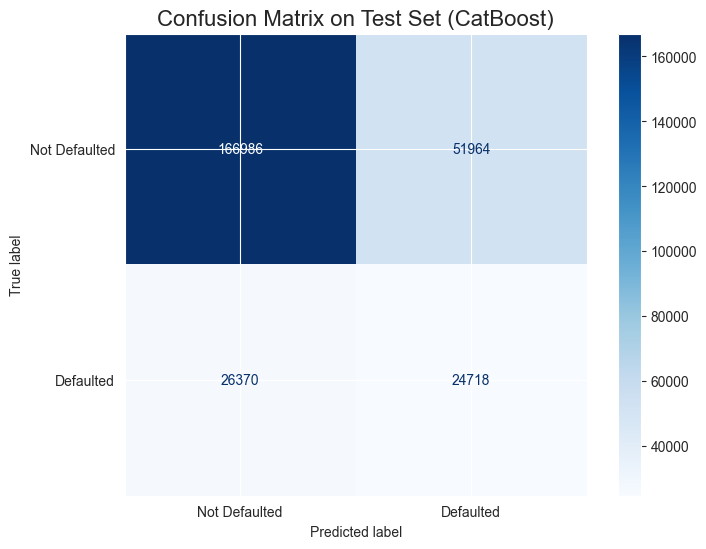

In [25]:
# Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Not Defaulted', 'Defaulted']
)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix on Test Set (CatBoost)', fontsize=16)
plt.show()